In [5]:
import pandas as pd
import yfinance as yf 

In [6]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [7]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [9]:
google_data.shape

(4961, 6)

In [10]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4.961000e+03
mean,43.663925,44.126729,43.224749,43.685074,43.685074,1.169255e+08
std,41.056940,41.520902,40.645858,41.091734,41.091734,1.502918e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.945228,13.095415,12.817706,12.954444,12.954444,2.787200e+07
50%,26.852776,27.027500,26.620501,26.834999,26.834999,5.778779e+07
75%,59.257500,59.803001,58.738251,59.325500,59.325500,1.449613e+08
max,175.990005,176.419998,171.399994,173.690002,173.690002,1.650833e+09


In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4961 entries, 2004-08-19 to 2024-05-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4961 non-null   float64
 1   High       4961 non-null   float64
 2   Low        4961 non-null   float64
 3   Close      4961 non-null   float64
 4   Adj Close  4961 non-null   float64
 5   Volume     4961 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.3 KB


In [12]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

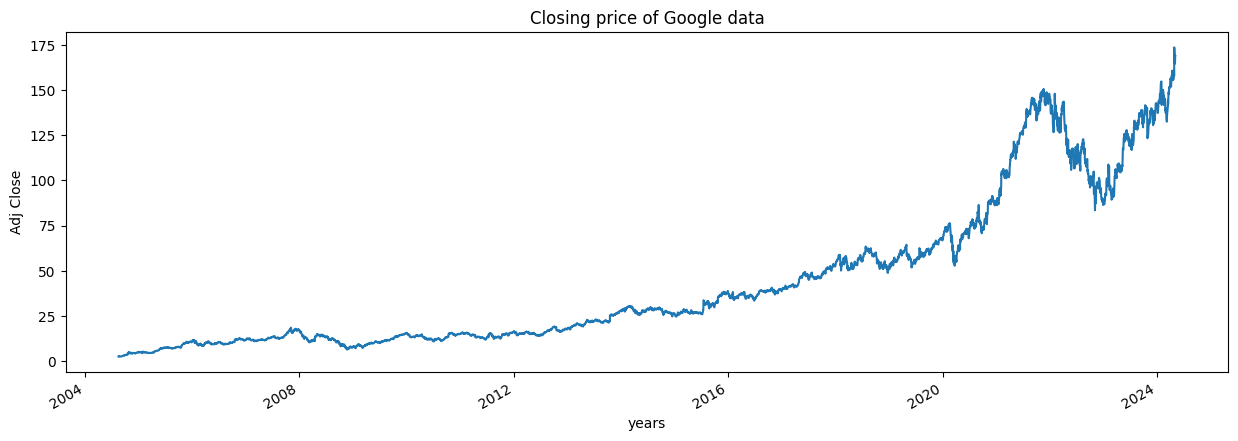

In [14]:
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [15]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

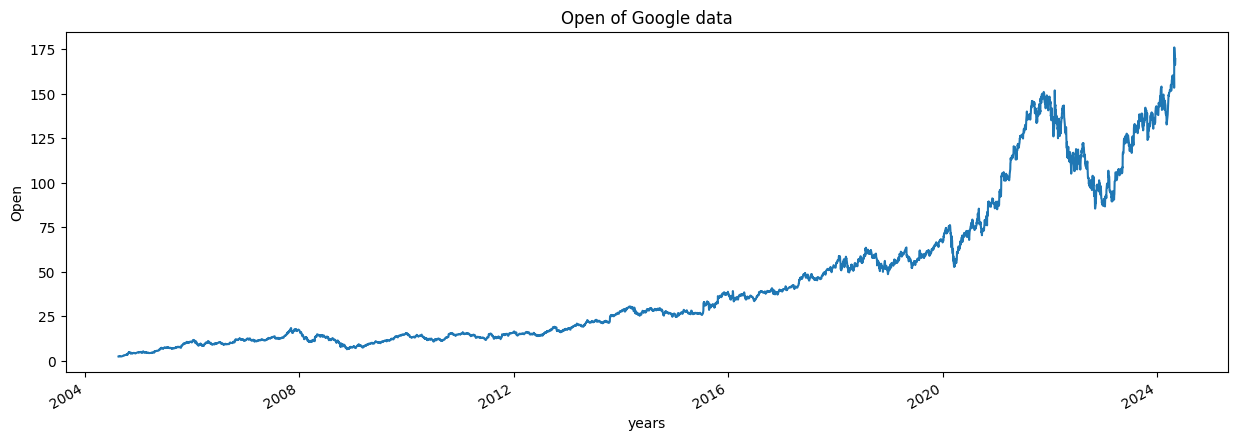

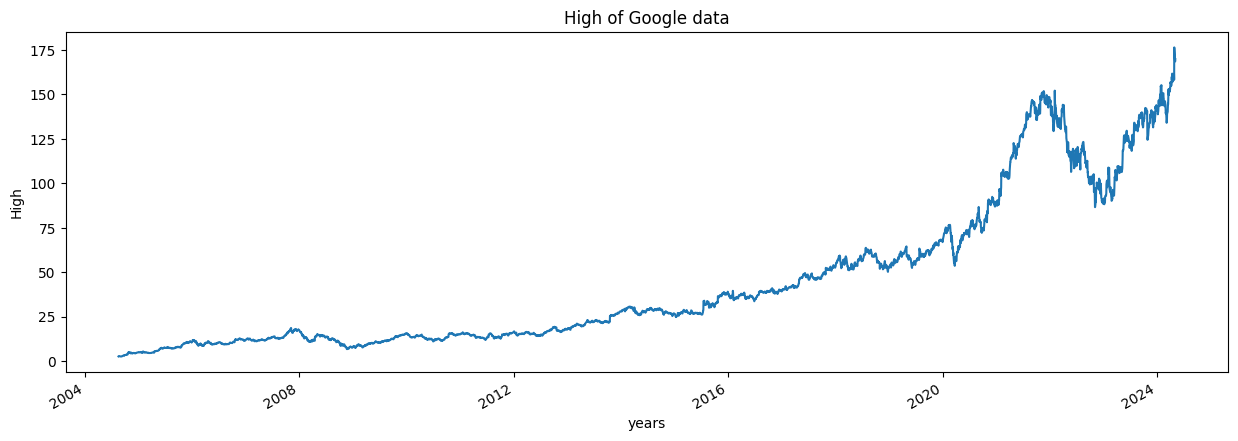

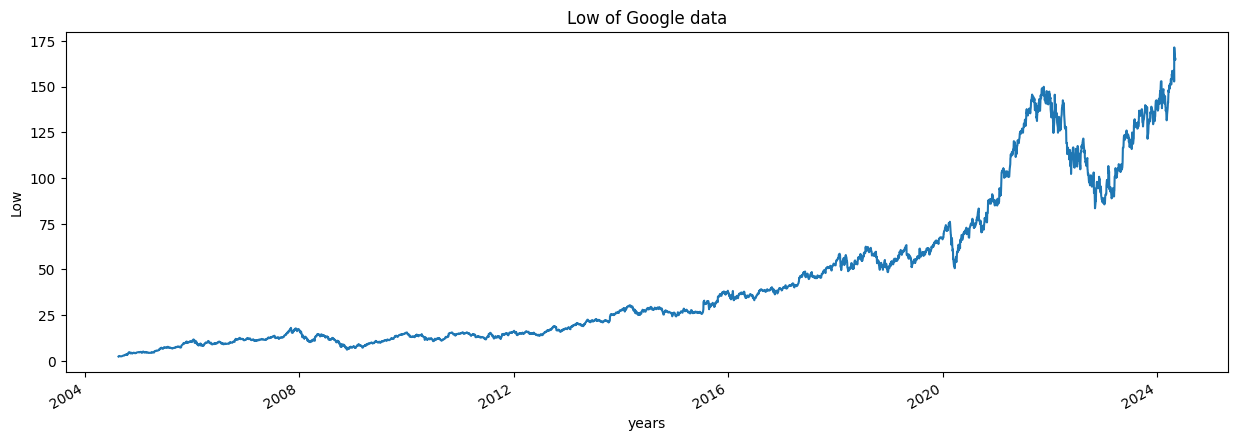

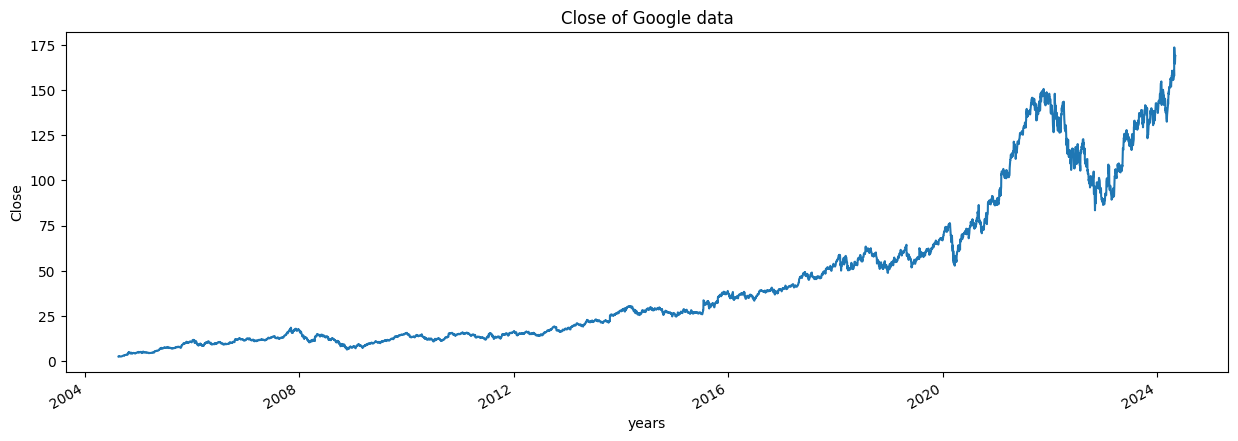

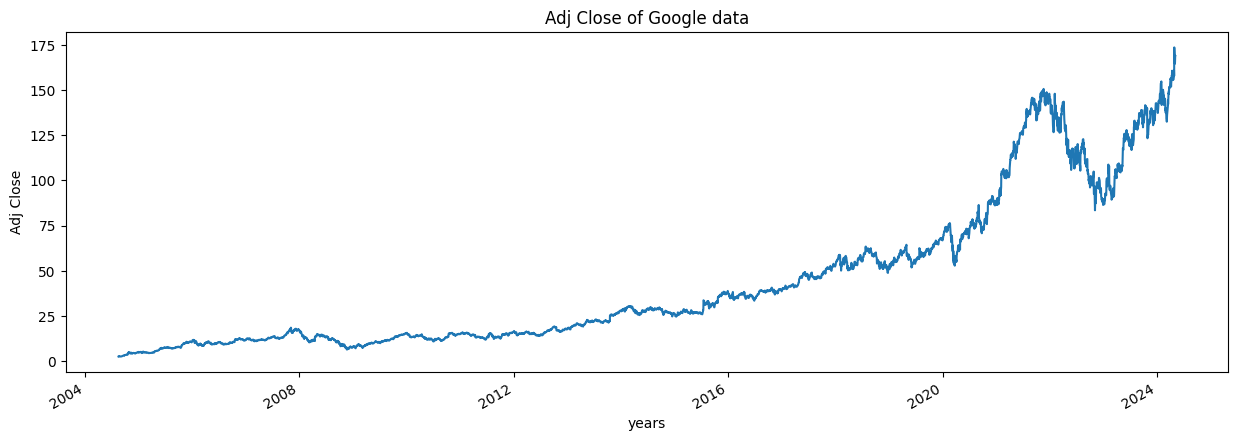

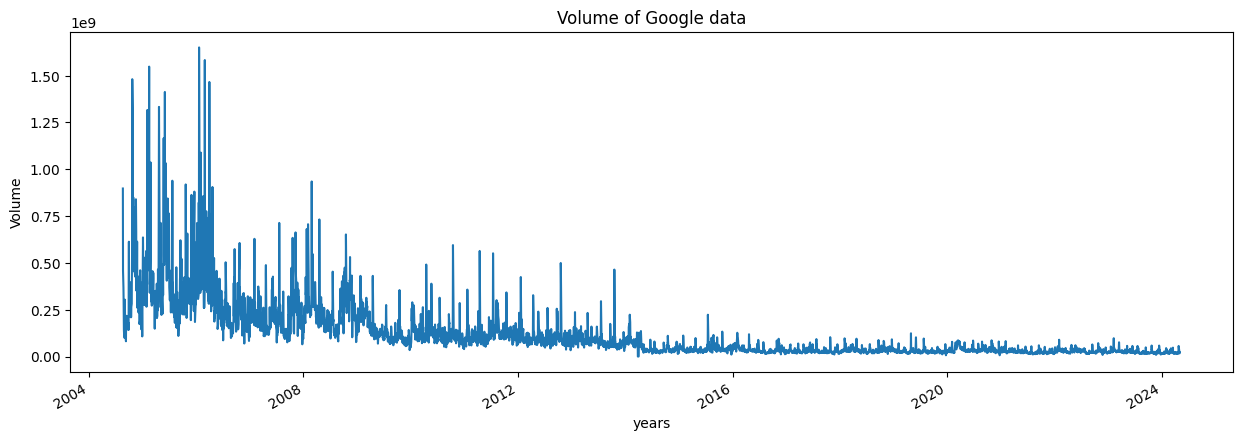

In [16]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

## Moving Average 

In [17]:
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 86


Tutaj sprawdzaliśmy ile razy zarejestrowano akcje w każdym roku, generalnie około 250 bo rejestrują się tylko w dni tygodnia, w weekendy nie. 

In [18]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

rolling oznacza tworzenie okna czasowego, które bierze dla każdego punktu 250 poprzednich rekordów 

In [19]:
google_data

,Open,High,Low,Close,Adj Close,Volume,MA_for_250_days
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,NaN
...,...,...,...,...,...,...,...
2024-04-29,170.770004,171.380005,167.059998,167.899994,167.899994,35914600,135.68186
2024-04-30,167.380005,169.869995,164.500000,164.639999,164.639999,29420800,135.91650
2024-05-01,166.179993,168.809998,164.899994,165.570007,165.570007,25223200,136.15430


In [20]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

<Figure size 640x480 with 0 Axes>

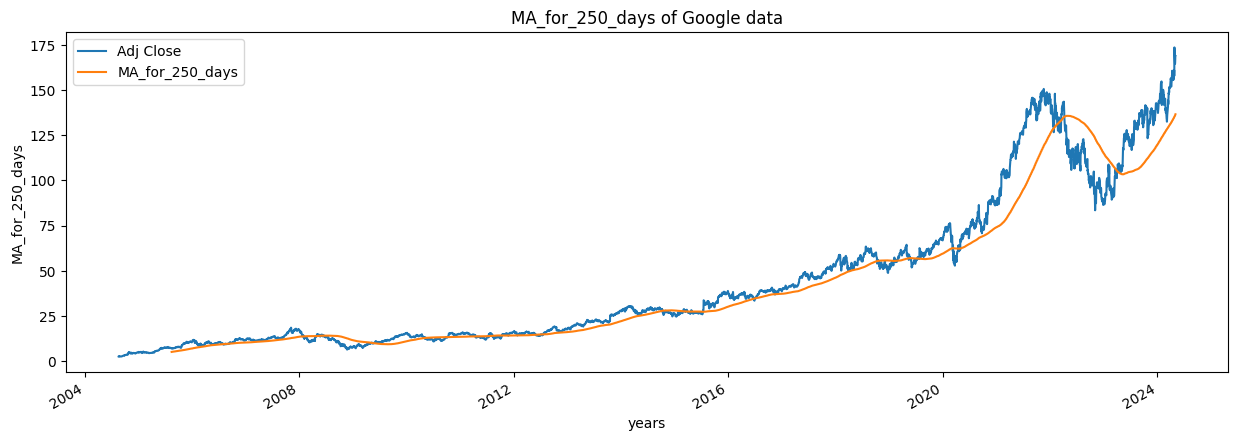

In [21]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

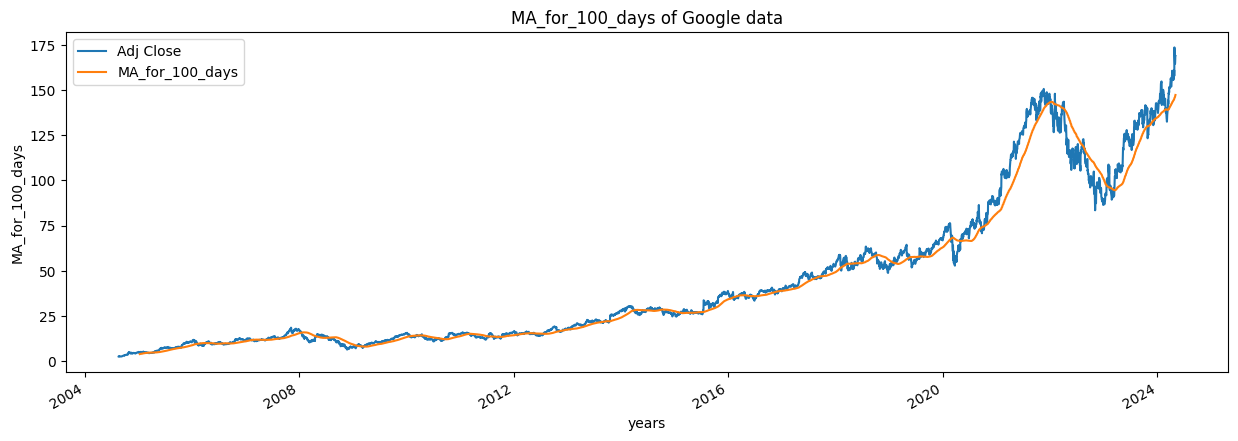

In [22]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

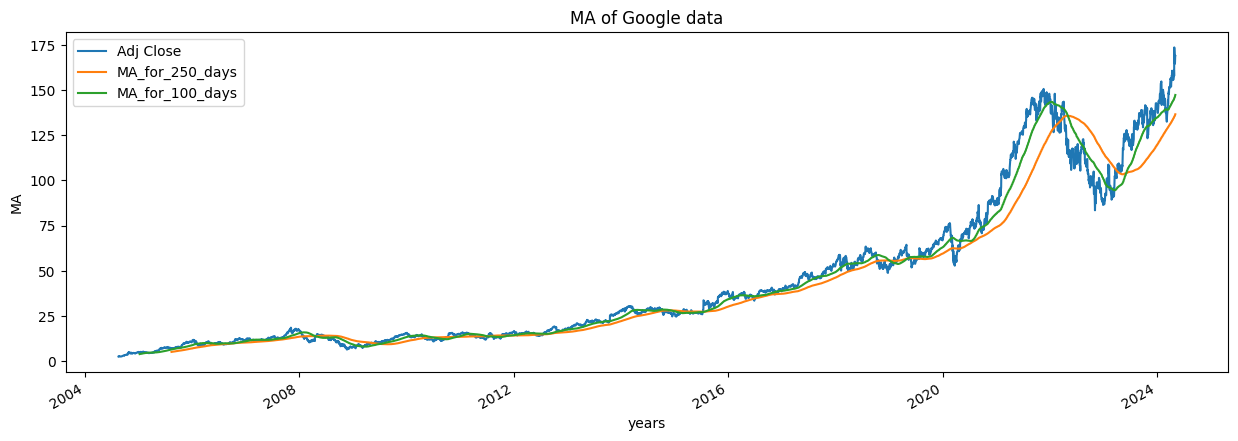

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days','MA_for_100_days']], 'MA')

In [24]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775


Percentage change to jak procentowo zmienia się kwota zamknięcia. 

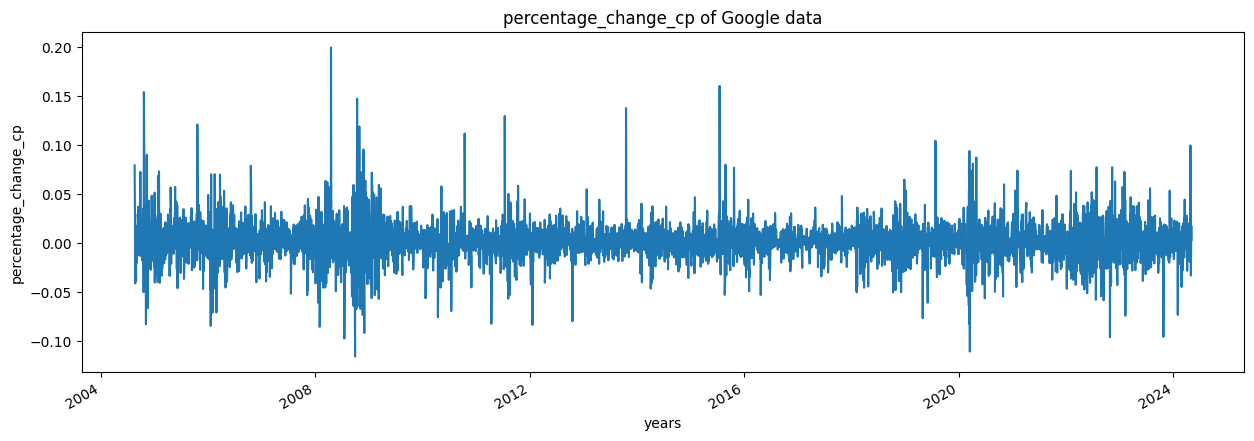

In [25]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [26]:
Adj_close_price = google_data[['Adj Close']]

In [27]:
(max(Adj_close_price.values), min(Adj_close_price.values))

(array([173.69000244]), array([2.49091291]))

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.80154176e-05],
       [1.20751854e-03],
       [1.36609420e-03],
       ...,
       [9.52569870e-01],
       [9.69450797e-01],
       [9.72546601e-01]])

In [29]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np 
x_data, y_data = np.array(x_data), np.array(y_data)

In [30]:
x_data[0], y_data[0]

(array([[4.80154176e-05],
        [1.20751854e-03],
        [1.36609420e-03],
        [7.07054110e-04],
        [8.71448216e-04],
        [1.14932293e-03],
        [8.93270874e-04],
        [2.90971091e-04],
        [3.43344077e-04],
        [3.49190376e-05],
        [2.18226577e-04],
        [0.00000000e+00],
        [2.28412341e-04],
        [3.33162491e-04],
        [3.34616406e-04],
        [7.73975999e-04],
        [1.08967340e-03],
        [1.67015610e-03],
        [1.74435035e-03],
        [2.03095134e-03],
        [2.54305683e-03],
        [2.81510892e-03],
        [2.59397451e-03],
        [2.67253190e-03],
        [3.02751705e-03],
        [2.88348612e-03],
        [2.65507935e-03],
        [3.90623624e-03],
        [4.52017709e-03],
        [4.30485974e-03],
        [4.73840228e-03],
        [5.09919752e-03],
        [5.58074851e-03],
        [5.39307783e-03],
        [5.65057962e-03],
        [5.48764082e-03],
        [5.12829811e-03],
        [5.43963237e-03],
        [5.9

In [31]:
int(len(x_data)*0.7)

3402

In [32]:
4908-100-int(len(x_data)*0.7)

1406

In [33]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3402, 100, 1)
(3402, 1)
(1459, 100, 1)
(1459, 1)


In [38]:
from tensorflow.keras.layers import LSTM, Dense

In [39]:
from keras import Sequential

In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))    

C:\Users\HP\PycharmProjects\stock_predicttion\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### batch_size - Określa liczbę przykładów treningowych, które będą przetwarzane jednocześnie podczas jednej iteracji procesu uczenia. Wartość batch_size=1 oznacza, że każdy przykład treningowy będzie przetwarzany osobno, co jest nazywane trenowaniem online (ang. online learning). Inne wartości, np. batch_size=32 lub batch_size=64, oznaczają, że dane treningowe zostaną podzielone na porcje (batche) o odpowiednim rozmiarze.
#### epochs- Określa liczbę epok, czyli liczba pełnych przejść przez cały zestaw danych treningowych. Każda epoka składa się z jednego lub więcej batchy, zależnie od wartości batch_size. Podanie epochs=2 oznacza, że model będzie uczony na całym zestawie danych treningowych przez dwie epoki

In [44]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3402/3402 ━━━━━━━━━━━━━━━━━━━━ 167s 49ms/step - loss: 3.7029e-05
Epoch 2/2
3402/3402 ━━━━━━━━━━━━━━━━━━━━ 147s 43ms/step - loss: 3.3823e-05


In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [46]:
predictions = model.predict(x_test)
predictions

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step


array([[0.32778093],
       [0.3277231 ],
       [0.32521284],
       ...,
       [0.91107297],
       [0.91337115],
       [0.9325557 ]], dtype=float32)

In [48]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.60671 ],
       [ 58.596806],
       [ 58.167053],
       ...,
       [158.46577 ],
       [158.85922 ],
       [162.1436  ]], dtype=float32)

In [49]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.79399872],
       [ 59.34799957],
       [ 59.24549866],
       ...,
       [165.57000732],
       [168.46000671],
       [168.99000549]])

In [52]:
inv_y_test.shape

(1459, 1)

In [54]:
inv_y_test.reshape(-1).shape

(1459,)

In [50]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [51]:
rmse

3.2664139592493853

In [58]:
import pandas as pd
ploting_data = pd.DataFrame(
    {
        'orginal_test_data': inv_y_test.reshape(-1), 
        'predictions': inv_predictions.reshape(-1)
    }, 
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,orginal_test_data,predictions
Date,,
2018-07-18,59.793999,58.606709
2018-07-19,59.348000,58.596806
2018-07-20,59.245499,58.167053
2018-07-23,60.275002,58.022289
2018-07-24,62.403999,58.989162


In [66]:
tuple(google_data.iloc[1].values)

(2.515820026397705,
 2.7168169021606445,
 2.5031180381774902,
 2.697638988494873,
 2.697638988494873,
 458857488.0,
 nan,
 nan,
 0.07942989417030355)

<Figure size 640x480 with 0 Axes>

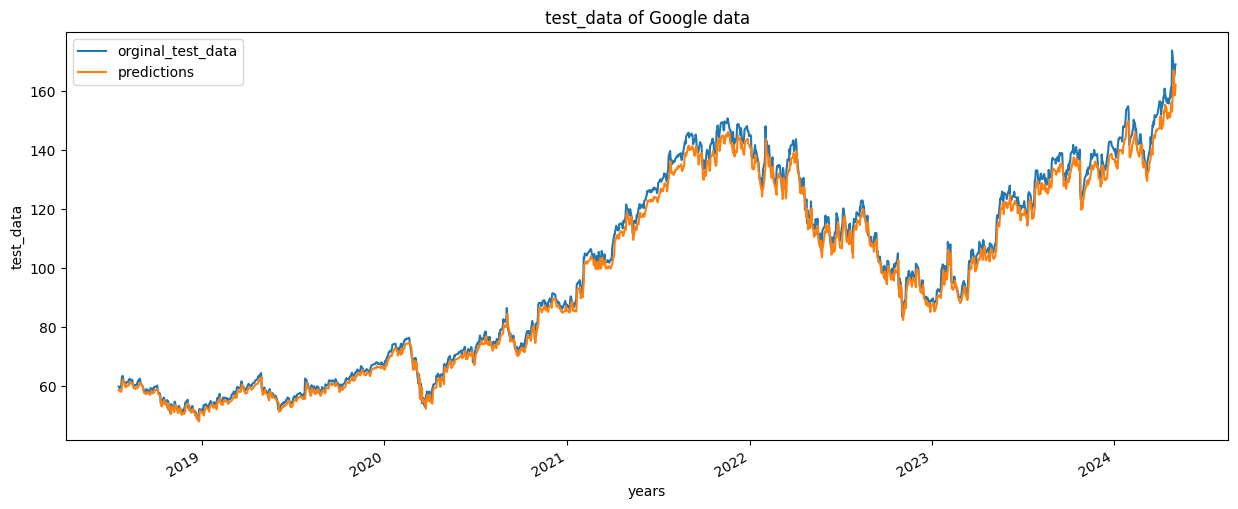

In [67]:
plot_graph((15,6), ploting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

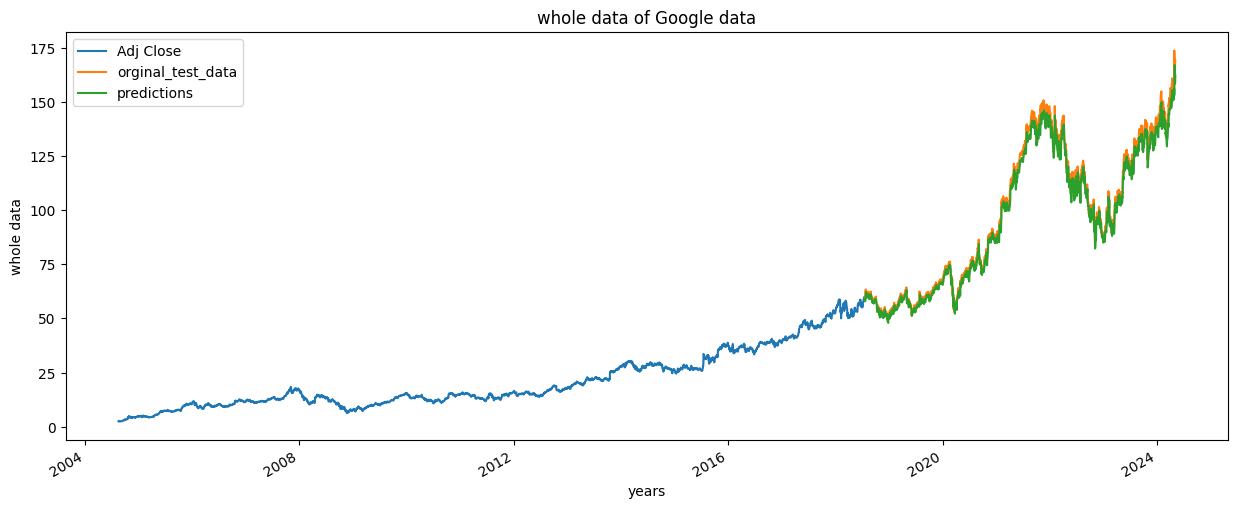

In [68]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis=0), 'whole data')

In [69]:
model.save("Latest_stock_price_model.keras")